## Домашнее задание 4. Сравнение алгоритмов классификации на наборах данных репозитория UCI. Решение

В рамках данного задания нужно выбрать один из наборов данных для задачи классификации из [репозитория UCI](http://archive.ics.uci.edu/ml/), выбрать несколько алгоритмов классификации и сравнить их на этом наборе данных.

In [78]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import seaborn as sns
figsize(12, 8)
import pandas as pd
import sys
if sys.version_info.major == 2:
    from urllib import urlopen
elif sys.version_info.major == 3:
    from urllib.request import urlopen
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report





Populating the interactive namespace from numpy and matplotlib



**Выберите любой набор данных для задачи классификации из [репозитория UCI](http://archive.ics.uci.edu/ml/) и загрузите его, используя функцию urlopen**

In [79]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/" +\
        "adult/adult.data"
url_test = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week','native-country', 'is_more_50']
df_train = pd.read_csv(url, names=names)
df_test = pd.read_csv(url_test, names=names)

In [82]:
encoder = LabelEncoder()
df_train['is_more_50'] = encoder.fit_transform(df_train['is_more_50'])
df_test['is_more_50'] = encoder.fit_transform(df_test['is_more_50'])
df_train['sex'] = encoder.fit_transform(df_train['sex'])
df_test['sex'] = encoder.fit_transform(df_test['sex'])


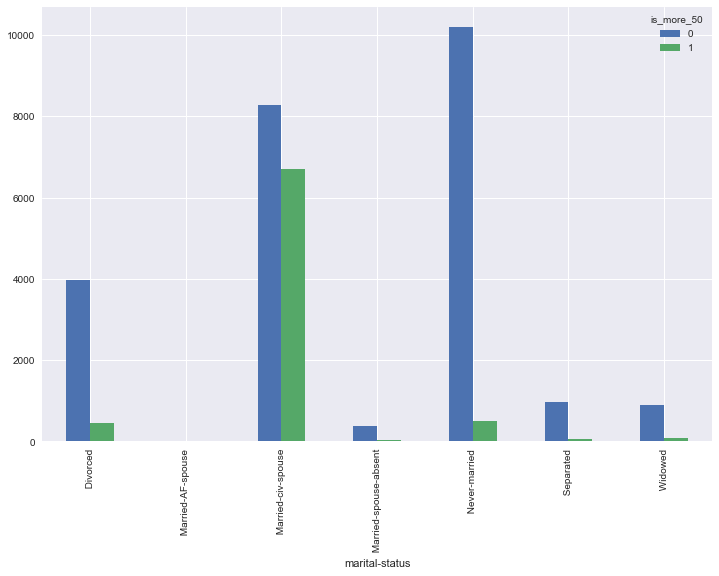

In [83]:
df_train.pivot_table('age', 'marital-status', 'is_more_50', 'count').plot(kind='bar')

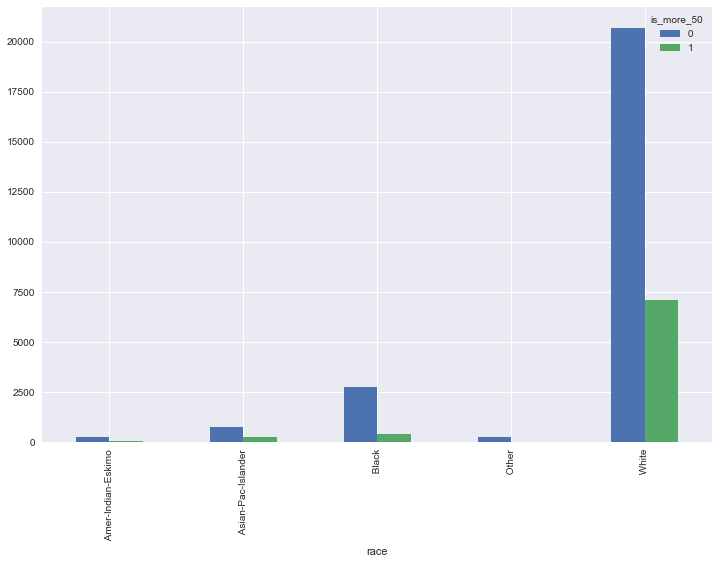

In [84]:
df_train.pivot_table('age', 'race', 'is_more_50', 'count').plot(kind='bar')

In [87]:
df_train = df_train.drop(['fnlwgt', 'education'], 1)
df_test = df_test.drop(['fnlwgt', 'education'], 1)

In [90]:
df_train.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_more_50
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [126]:
X_train = df_train[['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
X_test = df_test[['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
Y_train = df_train['is_more_50']
Y_test = df_test['is_more_50']

In [127]:
X_train['workclass'] = X_train['workclass'].str.strip()
X_train['marital-status'] = X_train['marital-status'].str.strip()
X_train['occupation'] = X_train['occupation'].str.strip()
X_train['relationship'] = X_train['relationship'].str.strip()
X_train['native-country'] = X_train['native-country'].str.strip()
X_train['race'] = X_train['race'].str.strip()


In [128]:
X_test['workclass'] = X_test['workclass'].str.strip()
X_test['marital-status'] = X_test['marital-status'].str.strip()
X_test['occupation'] = X_test['occupation'].str.strip()
X_test['relationship'] = X_test['relationship'].str.strip()
X_test['native-country'] = X_test['native-country'].str.strip()
X_test['race'] = X_test['race'].str.strip()


In [136]:
X_train['workclass'] = X_train['workclass'].replace(['?'], 'Private')
X_test['workclass'] = X_test['workclass'].replace(['?'], 'Private')


In [140]:
X_train['race'] =X_train['race'].replace([2,1,0,3], 2)
X_test['race'] =X_test['race'].replace([2,1,0,3], 2)

In [131]:
X_train['race'] = encoder.fit_transform(X_train['race'])
X_test['race'] = encoder.fit_transform(X_test['race'])

In [151]:
X_train['workclass'] = encoder.fit_transform(X_train['workclass'])
X_test['workclass'] = encoder.fit_transform(X_test['workclass'])

In [156]:
X_train['capital-gain'] = X_train['capital-gain'].map(lambda x: 1 if x > 0 else 0)
X_test['capital-gain'] = X_test['capital-gain'].map(lambda x: 1 if x > 0 else 0)
X_train['capital-loss'] = X_train['capital-loss'].map(lambda x: 1 if x > 0 else 0)
X_test['capital-loss'] = X_train['capital-loss'].map(lambda x: 1 if x > 0 else 0)


In [159]:
X_train['marital-status'] = X_train['marital-status'].map(lambda x: 'NON-Married-civ-spouse' if x !='Married-civ-spouse' else 'Married-civ-spouse')
X_test['marital-status'] = X_test['marital-status'].map(lambda x:  'NON-Married-civ-spouse' if x !='Married-civ-spouse' else 'Married-civ-spouse')


In [162]:
X_train['marital-status'] = encoder.fit_transform(X_train['marital-status'])
X_test['marital-status'] = encoder.fit_transform(X_test['marital-status'])

In [164]:
X_train['native-country'] = X_train['native-country'].map(lambda x: 'NON-USA' if x !='United-States' else 'United-States')
X_test['native-country'] = X_test['native-country'].map(lambda x:  'NON-USA' if x !='United-States' else 'United-States')
X_train['native-country'] = encoder.fit_transform(X_train['native-country'])
X_test['native-country'] = encoder.fit_transform(X_test['native-country'])

In [167]:
X_train['relationship'] = encoder.fit_transform(X_train['relationship'])
X_test['relationship'] = encoder.fit_transform(X_test['relationship'])


In [173]:
X_train['occupation'] = X_train['occupation'].replace(['?'], 'Other-service')
X_test['occupation'] = X_test['occupation'].replace(['?'], 'Other-service')

In [175]:
X_train['occupation'] = encoder.fit_transform(X_train['occupation'])
X_test['occupation'] = encoder.fit_transform(X_test['occupation'])


**Выведите основные характеристики выборки и разделите выборку на обучение и контроль**

## 1. Классификаторы без настройки параметров 

**Выберите несколько (2-3) классификаторов из sklearn. Для удобства (чтобы не переписывать один и тот же код для каждого классификатора) можно создать список классификаторов (который, например, может состоять из пар вида (classifier_instance(), 'classifier name'))**

In [178]:
classifiers = {"LogisticRegression": LogisticRegression(), "KNeighborsClassifier": KNeighborsClassifier(), 
               "Random Forest": RandomForestClassifier()}


**С помощью 5-кратной кросс-валидации оцените качество каждого классификатора на обучающей выборке. Используйте функцию cross_val_score. Попробуйте использовать разные метрики качества (параметр scoring)**

In [179]:
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_train, Y_train, cv=5, n_jobs=-1)
    print(name, scores.mean())

LogisticRegression 0.834157525999
KNeighborsClassifier 0.805810869284
Random Forest 0.824452578494


LogisticRegression: 0.831460 (0.004711)
KNeighborsClassifier: 0.800995 (0.005170)
Random Forest: 0.823291 (0.005901)


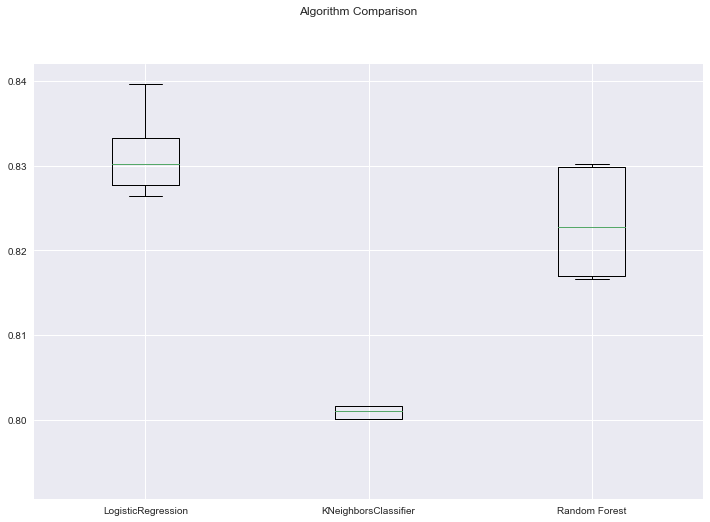

In [184]:
results = []
names = []
scoring = 'accuracy'
for name, model in classifiers.items():
    cv_results = cross_val_score(model, X_test, Y_test, cv=5, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Обучите те же классификаторы без параметров на всей обучающей выборке и проверьте их качество на тестовой выборке. Является ли лучшим классификатор, который имеет наибольшее качество на кросс-валидации?**

In [180]:
for name, classifier in classifiers.items():
    classifier.fit(X_train, Y_train)
    predicted = classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, predicted)
    print(name, accuracy)
    print(classification_report(Y_test, predicted))

LogisticRegression 0.831705669185
             precision    recall  f1-score   support

          0       0.86      0.92      0.89     12435
          1       0.68      0.53      0.60      3846

avg / total       0.82      0.83      0.82     16281

KNeighborsClassifier 0.808918371107
             precision    recall  f1-score   support

          0       0.86      0.90      0.88     12435
          1       0.61      0.53      0.57      3846

avg / total       0.80      0.81      0.80     16281

Random Forest 0.821878263006
             precision    recall  f1-score   support

          0       0.86      0.91      0.89     12435
          1       0.65      0.54      0.59      3846

avg / total       0.81      0.82      0.82     16281



## 2. Классификаторы с настройкой параметров 

**Настройте параметры выбранных вами алгоритмов с помощью GridSearchCV и выберите лучший классификатор**

In [187]:
params_lr = {'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
params_kn = {'n_neighbors': [x for x in range(2,50,4)], 'p': [x for x in range(1,5)] }
params_rf = {'n_estimators': [x for x in range(10,200,10)]}


LR_grid = GridSearchCV(estimator=LogisticRegression(), param_grid=params_lr, n_jobs=-1, cv=5)
LR_grid.fit(X_train, Y_train)
print(LR_grid.best_estimator_)
predicted_by_LR = LR_grid.best_estimator_.predict(X_test)
accuracy_by_best_LR = accuracy_score(Y_test, predicted_by_LR)
print('LinReg', accuracy_by_best_LR)
    
KN_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_kn, n_jobs=-1, cv=5)
KN_grid.fit(X_train, Y_train)
print('\n',KN_grid.best_estimator_)
predicted_by_KN = KN_grid.best_estimator_.predict(X_test)
accuracy_by_best_KN = accuracy_score(Y_test, predicted_by_KN)
print('\n', 'Kneighbors', accuracy_by_best_KN)

RF_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params_rf, n_jobs=-1, cv=5)
RF_grid.fit(X_train, Y_train)
print('\n',RF_grid.best_estimator_)
predicted_by_RF = RF_grid.best_estimator_.predict(X_test)
accuracy_by_best_RF = accuracy_score(Y_test, predicted_by_RF)
print('\n', 'RandomForest', accuracy_by_best_RF)



LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LinReg 0.829985873104

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=1,
           weights='uniform')

 Kneighbors 0.823843744242

 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=160, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

 RandomForest 0.826177753209


In [188]:
print('\nLogReg: \n', classification_report(Y_test, predicted_by_LR))
print('\nKN: \n', classification_report(Y_test, predicted_by_KN))
print('\nRandForest: \n', classification_report(Y_test, predicted_by_RF))


LogReg: 
              precision    recall  f1-score   support

          0       0.86      0.92      0.89     12435
          1       0.68      0.52      0.59      3846

avg / total       0.82      0.83      0.82     16281


KN: 
              precision    recall  f1-score   support

          0       0.86      0.93      0.89     12435
          1       0.67      0.49      0.57      3846

avg / total       0.81      0.82      0.81     16281


RandForest: 
              precision    recall  f1-score   support

          0       0.87      0.91      0.89     12435
          1       0.65      0.56      0.60      3846

avg / total       0.82      0.83      0.82     16281



In [191]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, predicted_by_LR))
print(confusion_matrix(Y_test, predicted_by_KN))
print(confusion_matrix(Y_test, predicted_by_RF))

[[11500   935]
 [ 1833  2013]]
[[11511   924]
 [ 1944  1902]]
[[11291  1144]
 [ 1686  2160]]


**Для лучшего классификатора и набора параметров для него выберите более мелкую сетку (для того чтобы уточнить лучшие значения параметров). Для этого классификатора настройте параметры по обучающей выборке с помощью GridSearchCV. Постройте график зависимости среднего качества на кросс-валидации от значений параметров**

In [201]:
grid = GridSearchCV(estimator=LogisticRegression(),
                    param_grid={'penalty': ['l2'], 'C': [0.01, 0.03, 0.04, 0.05, 0.07, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95] }, n_jobs=-1, cv=5)
grid.fit(X_train, Y_train)
print('best: \n', grid.best_estimator_)
predicted = grid.best_estimator_.predict(X_test)
print('\nLogReg: \n', classification_report(Y_test, predicted))


best: 
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogReg: 
              precision    recall  f1-score   support

          0       0.86      0.92      0.89     12435
          1       0.68      0.52      0.59      3846

avg / total       0.82      0.83      0.82     16281



**Для полученной модели посчитайте качество на тестовой выборке и сравните его с качеством, полученным без настройки параметров**

**Можно поварьировать параметр scoring и позапускать написанный код ещё раз. Изменится ли лучший классификатор?**

## Ссылки:

 - <a href="http://archive.ics.uci.edu/ml/">UCI Machine Learning Repository</a> 
 - <a href="http://scikit-learn.org/stable/index.html">Scikit-learn documentation</a>